In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib

import numpy as np
import wlcstat.wlc_copoly as wlc_copoly
import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import basinhopping

from gaus_vertex import *

import time

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

import cga

# CONCLUSION:
strucutre factor calculations are accurate for ABA single chains!

In [ ]:
# %%time 

# #for gaus cga
# N = 1000
# b = 1
# n_b_gaus_cga = 100
# std = (b*((N/n_b_gaus_cga)**0.5))#*(3**-0.5)

# n_p = 15
# num_snaps_gaus_cga = 100

# num_steps = n_b_gaus_cga * n_p * (num_snaps_gaus_cga)
# poly_gaus_cga = [0]*int(n_b_gaus_cga/2) + [1]*int(n_b_gaus_cga/2)

# #for gaus exact
# poly_mat = [0,1]
# dens = [1.]
# M = 2
# b = 1
# N_m = N/M

# # %%time
# #gaus_cga


# s2_gaus_cga_AA_n = np.zeros(nk,  dtype = type(1 + 1j))
# s2_gaus_cga_AB_n = np.zeros(nk,  dtype = type(1 + 1j))
# s2_gaus_cga_BB_n = np.zeros(nk,  dtype = type(1 + 1j))

# # gaus single chan sim
# steps = np.random.normal(scale = std, size=(num_steps,3))
# poly = np.cumsum(steps, axis = 0)

# # for i_snap in num_snaps_gaus_cga:
# #     steps = np.random.normal(scale = std, size=(n_p*n_b_gaus_cga,3)
# #     r_snap = np.cumsum(steps, axis = 0)
# # r_i = r_snap/2
# # for i_p in range(n_p):
# # gaus single chan sim
# r_snap = poly
# # r_i = r_snap/2
# for i_p in range(n_p*num_snaps_gaus_cga):
#     i_0 = n_b_gaus_cga * i_p
#     i_f = i_0 + n_b_gaus_cga
# #     u_i = u_snap[i_0:i_f, :]
#     r_i = r_snap[i_0:i_f, 0:3]/2
# #         sigma_i = r_snap[i_0:i_f, 3] 
# #         sigma_j = 1-sigma_i
#     sigma_A = np.array(poly_gaus_cga)# r_snap[i_0:i_f, 3] 
#     sigma_B = 1-sigma_A

#     s_mat1 = sigma_A*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
#     s_mat1_neg = sigma_A*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

#     s_mat2 = sigma_B*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
#     s_mat2_neg = sigma_B*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

#     s2_gaus_cga_AA_n += np.sum(s_mat1, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)
#     s2_gaus_cga_AB_n += np.sum(s_mat1, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)
#     s2_gaus_cga_BB_n += np.sum(s_mat2, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)

# #GAUSSIAN
# s2_gaus_AA, s2_gaus_AB, s2_gaus_BA, s2_gaus_BB = calc_sf2(poly_mat, dens, N_m, b, k1_vec)   

In [ ]:
# plt.figure(figsize=(10,8))
# font = {'family' : 'serif',
#         'weight':'normal',
#         'size': 18}
# plt.rc('font', **font)

# # plt.plot(k_vec, s2_sim_AA, label = "sim AA")
# plt.plot(k_vec, s2_gaus_AA/N**2, label = "gaus_AA", linestyle = "--")
# # plt.plot(k_vec, s2_vert_AA/N**2, label = "vert_AA", linestyle = "dotted")
# # plt.plot(k_vec, s2_cga_AA, label = "cga AA")
# plt.plot(k_vec, s2_gaus_cga_AA, label = "gaus_cga AA 1000 beads")
# plt.plot(k_vec, s2_gaus_cga_AA_n, label = "gaus_cga AA 100 beads")

# # plt.plot(k_vec, s2_sim_AB/length_kuhn**2, label = "sim AB")
# # plt.plot(k_vec, s2_gaus_AB/N**2, label = "gaus_AB", linestyle = "--")

# # plt.plot(k_vec, s2_sim_BB/length_kuhn**2, label = "sim BB")
# # plt.plot(k_vec, s2_gaus_BB/N**2, label = "gaus_BB", linestyle = "--")



# plt.xscale('log')
# plt.yscale('log')

# plt.title("S2 AA N = "+str(N))
# plt.xlabel(r'$K$')
# plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
# plt.tight_layout()
# plt.legend()
# plt.show()

#### S2

In [62]:
%%time
#for vertex
# FA = 0.5
N = 10000

#for gaus
# poly_mat = [0,1]
# M = 2
poly_mat = [0,1,1,0]
M = 4
dens = [1.]
b = 1
N_m = N/M
# k_vec = np.logspace(-2, 2, 50)

#for sim
n_p = 15
# n_b = 200
# n_b_calc = n_b 
# poly_sim = [0]*int(n_b/2) + [1]*int(n_b/2)
# length_kuhn = 10
i_snap_0 = 9000
i_snap_f = 10000

# #for cga
# num_snapshots = 1
# DEL = 1
# n_b_cga = int((N*2)/DEL)
# n_p_cga = n_p*(i_snap_f - i_snap_0)
# poly_cga = [0]*int(n_b_cga/2) + [1]*int(n_b_cga/2)
# otpt_dss = cga.dsswlc_cga(N, num_snapshots*n_p_cga, int( (N*2)/DEL ), FA, num_snapshots, DEL)

#for gaus cga
n_p_gaus_cga = n_p
n_b_gaus_cga = 20#n_b
poly_gaus_cga = [0]*int(n_b_gaus_cga/4) + [1]*int(n_b_gaus_cga/2) + [0]*int(n_b_gaus_cga/4)
# poly_gaus_cga = [0]*int(n_b_gaus_cga/2) + [1]*int(n_b_gaus_cga/2)
# num_snaps_gaus_cga = 10
# num_steps = n_b_gaus_cga * n_p * (num_snaps_gaus_cga)
std = (b*((N/(3*n_b_gaus_cga))**0.5))#*(3**-0.5)


k0 = 1e-2
kf = 1e2
nk = 50

k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)

k1_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)

Wall time: 15.6 ms


In [66]:
(3**-0.5)

0.5773502691896257

In [ ]:
%%time
#VERTEX
s2_vert_AA = np.zeros(nk)
s2_vert_AB = np.zeros(nk)
for i in range(nk):
    Ks = k_vec[i]
    s2_mat = (s2wlc(pset, N, FA, Ks, sequence='all'))
    s2_vert_AA[i] = s2_mat[0][0]
    s2_vert_AB[i] = s2_mat[0][1]

In [63]:
#GAUSSIAN
s2_gaus_AA, s2_gaus_AB, s2_gaus_BA, s2_gaus_BB = calc_sf2(poly_mat, dens, N_m, b, k1_vec)

In [ ]:
%%time
#SIM
# i_snap_f = 10000
# i_snap_0 = 9000

s2_sim_AA = np.zeros(nk,  dtype = type(1 + 1j))
s2_sim_AB = np.zeros(nk,  dtype = type(1 + 1j))
s2_sim_BB = np.zeros(nk,  dtype = type(1 + 1j))
for i_snap in range(i_snap_0, i_snap_f + 1):
    r_snap = np.loadtxt('sim_data_1k/r' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b
        #u_i = u_snap[i_0:i_f, :]
        r_i = r_snap[i_0:i_f, 0:3]/ 2 
        sigma_A = np.array(poly_sim)# r_snap[i_0:i_f, 3] 
        sigma_B = 1-sigma_A

        s_mat1 = sigma_A*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
        s_mat1_neg = sigma_A*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

        s_mat2 = sigma_B*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
        s_mat2_neg = sigma_B*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        
        
        s2_sim_AA += np.sum(s_mat1, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p)
        s2_sim_AB += np.sum(s_mat1, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p)
        s2_sim_BB += np.sum(s_mat2, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p)


In [64]:
%%time
# gaus cga copying sim

s2_gaus_cga_AA = np.zeros(nk,  dtype = type(1 + 1j))
s2_gaus_cga_AB = np.zeros(nk,  dtype = type(1 + 1j))
s2_gaus_cga_BA = np.zeros(nk,  dtype = type(1 + 1j))
s2_gaus_cga_BB = np.zeros(nk,  dtype = type(1 + 1j))
for i_snap in range(i_snap_0, i_snap_f + 1):
#     r_snap = np.loadtxt('sim_data_1k/r' + str(i_snap))
    steps = np.random.normal(scale = std, size=(n_p_gaus_cga * n_b_gaus_cga,3))
    for i_p in range(n_p_gaus_cga):
        i_0 = n_b_gaus_cga * i_p
        i_f = i_0 + n_b_gaus_cga
#         r_i = r_snap[i_0:i_f, 0:3]/ 2 
        r_i = np.cumsum(steps[i_0:i_f], axis = 0)
        sigma_A = 1-np.array(poly_gaus_cga) #should be same as poly_gaus_cga 
        sigma_B = 1-sigma_A

        s_mat1 = sigma_A*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
        s_mat1_neg = sigma_A*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

        s_mat2 = sigma_B*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
        s_mat2_neg = sigma_B*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        
        
        s2_gaus_cga_AA += np.sum(s_mat1, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_gaus_cga ** 2 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s2_gaus_cga_AB += np.sum(s_mat1, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s2_gaus_cga_BA += np.sum(s_mat2, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_gaus_cga ** 2 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s2_gaus_cga_BB += np.sum(s_mat2, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)


Wall time: 10 s


In [ ]:
%%time
#CGA
s2_cga_AA = np.zeros(nk,  dtype = type(1 + 1j))
s2_cga_AB = np.zeros(nk,  dtype = type(1 + 1j))
s2_cga_BB = np.zeros(nk,  dtype = type(1 + 1j))


r_snap = otpt_dss
for i_p in range(n_p_cga):
    i_0 = n_b_cga * i_p
    i_f = i_0 + n_b_cga
    #u_i = u_snap[i_0:i_f, :]
    r_i = r_snap[i_0:i_f, 0:3]/2
#         sigma_i = r_snap[i_0:i_f, 3] 
#         sigma_j = 1-sigma_i
    sigma_A = 1-np.array(poly_cga)# r_snap[i_0:i_f, 3] 
    sigma_B = 1-sigma_A

    s_mat1 = sigma_A*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
    s_mat1_neg = sigma_A*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

    s_mat2 = sigma_B*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
    s_mat2_neg = sigma_B*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

    s2_cga_AA += np.sum(s_mat1, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_cga ** 2 * (n_p_cga+1))
    s2_cga_AB += np.sum(s_mat1, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_cga ** 2 * (n_p_cga+1))
    s2_cga_BB += np.sum(s_mat2, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_cga ** 2 * (n_p_cga+1))


In [ ]:
# %%time
# #gaus_cga

# s2_gaus_cga_AA = np.zeros(nk,  dtype = type(1 + 1j))
# s2_gaus_cga_AB = np.zeros(nk,  dtype = type(1 + 1j))
# s2_gaus_cga_BB = np.zeros(nk,  dtype = type(1 + 1j))

# # gaus single chain sim
# steps = np.random.normal(scale = std, size=(num_steps,3))
# poly = np.cumsum(steps, axis = 0)

# r_snap = poly
# # r_i = r_snap/2
# for i_p in range(n_p*num_snaps_gaus_cga):
#     i_0 = n_b_gaus_cga * i_p
#     i_f = i_0 + n_b_gaus_cga
# #     u_i = u_snap[i_0:i_f, :]
#     r_i = r_snap[i_0:i_f, 0:3]/2
# #         sigma_i = r_snap[i_0:i_f, 3] 
# #         sigma_j = 1-sigma_i
#     sigma_A = np.array(poly_gaus_cga)# r_snap[i_0:i_f, 3] 
#     sigma_B = 1-sigma_A

#     s_mat1 = sigma_A*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
#     s_mat1_neg = sigma_A*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

#     s_mat2 = sigma_B*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
#     s_mat2_neg = sigma_B*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        

#     s2_gaus_cga_AA += np.sum(s_mat1, axis = 1) * np.sum(s_mat1_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)
#     s2_gaus_cga_AB += np.sum(s_mat1, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)
#     s2_gaus_cga_BB += np.sum(s_mat2, axis = 1) * np.sum(s_mat2_neg, axis = 1) / (n_b_gaus_cga ** 2 * (num_snaps_gaus_cga + 1) * n_p)


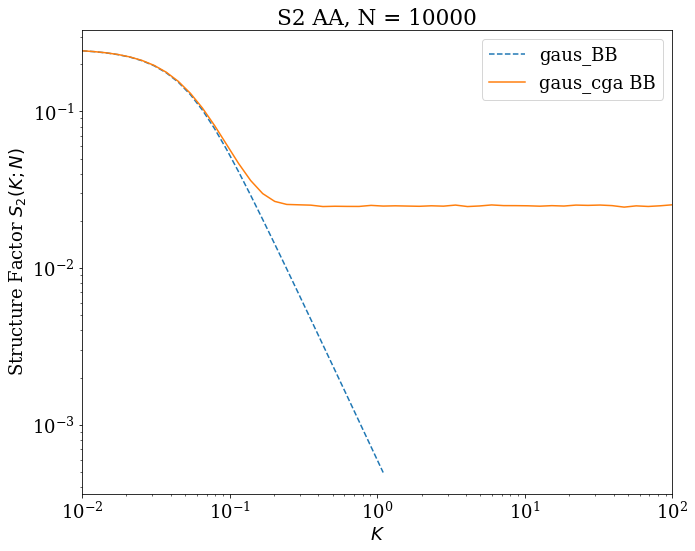

In [65]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2_sim_AA, label = "sim AA")
# plt.plot(k_vec, s2_gaus_AA/N**2, label = "gaus_AA", linestyle = "--")
# plt.plot(k_vec, s2_vert_AA/N**2, label = "vert_AA", linestyle = "dotted")
# plt.plot(k_vec, s2_cga_AA, label = "cga AA")
# plt.plot(k_vec, s2_gaus_cga_AA, label = "gaus_cga AA")

# # plt.plot(k_vec, s2_sim_AB/length_kuhn**2, label = "sim AB")
# plt.plot(k_vec, s2_gaus_AB/N**2, label = "gaus_AB", linestyle = "--")
# plt.plot(k_vec, s2_gaus_cga_AB, label = "gaus_cga AB")

# plt.plot(k_vec, s2_gaus_BA/N**2, label = "gaus_BA", linestyle = "--")
# plt.plot(k_vec, s2_gaus_cga_BA, label = "gaus_cga BA")

# # plt.plot(k_vec, s2_sim_BB/length_kuhn**2, label = "sim BB")
plt.plot(k_vec, s2_gaus_BB/N**2, label = "gaus_BB", linestyle = "--")
plt.plot(k_vec, s2_gaus_cga_BB, label = "gaus_cga BB")



plt.xscale('log')
plt.yscale('log')

plt.title("S2 AA, N = "+str(N))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# # code to generate a single guassian polymer conformation
# N = 1000 #overall polymer contour length
# n_b_gaus_cga = 10 #number of beads per polymer
# std = (0.5*b*(N/n_b_gaus_cga)**0.5)*1.15 # standard deviation of bond gaussian dist
# steps = np.random.normal(scale = std, size=(n_b_gaus_cga,3))
# r_poly = np.cumsum(steps, axis = 0)

#### S3

In [3]:
# FA = 0.5
N = 1000

# poly_mat = [0,1]
# M = 2
poly_mat = [0,1,1,0]
M = 4
dens = [1.]
b = 1
N_m = N/M
k_vec = np.logspace(-2, 2, 50)

n_p = 15
# n_b = 200
# n_b_calc = n_b 
# poly_sim = [0]*int(n_b/2) + [1]*int(n_b/2)
# poly_sim = [0]*int(n_b/4) + [1]*int(n_b/2) + [0]*int(n_b/4)
# length_kuhn = 10
i_snap_0 = 9000
i_snap_f = 10000

# num_snapshots = 1
# DEL = 1
# n_b_cga = int((N*2)/DEL)
# n_p_cga = n_p*(i_snap_f - i_snap_0)
# poly_cga = [0]*int(n_b_cga/2) + [1]*int(n_b_cga/2)
# # otpt_dss = cga.dsswlc_cga(N, num_snapshots*n_p_cga, int( (N*2)/DEL ), FA, num_snapshots, DEL)

#for gaus cga
n_p_gaus_cga = n_p
n_b_gaus_cga = 20#n_b
# poly_gaus_cga = [0]*int(n_b_gaus_cga/2) + [1]*int(n_b_gaus_cga/2)
poly_gaus_cga = [0]*int(n_b_gaus_cga/4) + [1]*int(n_b_gaus_cga/2) + [0]*int(n_b_gaus_cga/4)
# num_snaps_gaus_cga = 10
# num_steps = n_b_gaus_cga * n_p * (num_snaps_gaus_cga)
std = (b*((N/(3*n_b_gaus_cga))**0.5))#*(3**-0.5)

k0 = 1e-2
kf = 1e2
nk = 50
k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5
theta = 2*np.pi/3 #2* np.pi * 1 / 3

frac = 1
k2_vec[:, 0] += frac * np.cos(theta) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec = - k1_vec - k2_vec

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

# length_kuhn = 10.
# s3_th_theta0 = wlcstruc.s3_wlc(k1_vec, k2_vec, length_kuhn, dimensions = 3, alpha_max = 25)

In [4]:
%%time
s3_gaus_AAA, s3_gaus_AAB, s3_gaus_ABA,\
s3_gaus_BAA, s3_gaus_ABB, s3_gaus_BAB,\
s3_gaus_BBA, s3_gaus_BBB = calc_sf3(poly_mat, dens, N_m, b, k1_vec, k2_vec, plotting = True)

Wall time: 100 ms


In [ ]:
# %%time
# #VERTEX

# s3_arr_vert_AAA = np.zeros(nk)
# s3_arr_vert_AAB = np.zeros(nk)
# s3_arr_vert_ABB = np.zeros(nk)
# s3_arr_vert_BBB = np.zeros(nk)

# s3_arr_vert_ABA = np.zeros(nk)
# s3_arr_vert_BAB = np.zeros(nk)
# s3_arr_vert_BBA = np.zeros(nk)
# s3_arr_vert_BAA = np.zeros(nk)

# for i in range(nk):
# #     Ks = k1_vec[i], k1_vec[i], -2*k1_vec[i]
# #     Ks = k1_vec[i], -k1_vec[i], 0
#     Ks = k1_vec[i], k2_vec[i], k3_vec[i]

# #     Ks = k1_vec[i], k2_vec[i], -k1_vec[i] - k2_vec[i]
#     s3_mat = (s3wlc(pset, N, FA, Ks, sequence='all'))/N**3
#     s3_arr_vert_AAA[i] = s3_mat[0][0][0]
#     s3_arr_vert_AAB[i] = s3_mat[0][0][1]
#     s3_arr_vert_ABA[i] = s3_mat[0][1][0]
#     s3_arr_vert_BAA[i] = s3_mat[1][0][0]
#     s3_arr_vert_ABB[i] = s3_mat[0][1][1]
#     s3_arr_vert_BAB[i] = s3_mat[1][0][1]
#     s3_arr_vert_BBA[i] = s3_mat[1][1][0]
#     s3_arr_vert_BBB[i] = s3_mat[1][1][1]
# # s4_arr_vert_BBBB[0] = s4_mat[1][1][1][1]

In [ ]:
# %%time
# s3_sim_AAA = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_AAB = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_ABA = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_BAA = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_ABB = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_BAB = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_BBA = np.zeros(nk, dtype = type(1 + 1j))
# s3_sim_BBB = np.zeros(nk, dtype = type(1 + 1j))

# for i_snap in range(i_snap_0, i_snap_f + 1):
#     r_snap = np.loadtxt('sim_data_1k/r' + str(i_snap))
#     for i_p in range(n_p):
#         i_0 = n_b * i_p
#         i_f = i_0 + n_b_calc
# #         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, :] / 2
#         sigma_A = np.array(poly_sim)# r_snap[i_0:i_f, 3] 
#         sigma_B = 1-sigma_A
        
#         s_mat1_A = sigma_A*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
#         s_mat1_B = sigma_B*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        
#         s_mat2_A = sigma_A*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
#         s_mat2_B = sigma_B*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        
#         s_mat3_A = sigma_A*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
#         s_mat3_B = sigma_B*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        
#         s3_sim_AAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_AAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_ABA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_BAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_ABB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_BBA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_BAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s3_sim_BBB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)
# #         s3_sim += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) * np.sum(s_mat3, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)

In [5]:
%%time
s3_gaus_cga_AAA = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_AAB = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_ABA = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BAA = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_ABB = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BAB = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BBA = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BBB = np.zeros(nk, dtype = type(1 + 1j))

for i_snap in range(i_snap_0, i_snap_f + 1):
#     r_snap = np.loadtxt('gaus_cga_data_1k/r' + str(i_snap))
    steps = np.random.normal(scale = std, size=(n_p_gaus_cga * n_b_gaus_cga,3))
    for i_p in range(n_p_gaus_cga):
        i_0 = n_b_gaus_cga * i_p
        i_f = i_0 + n_b_gaus_cga
#         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, :] / 2
        r_i = np.cumsum(steps[i_0:i_f], axis = 0)

        sigma_A = 1-np.array(poly_gaus_cga)# r_snap[i_0:i_f, 3] 
        sigma_B = 1-sigma_A
        
        s_mat1_A = sigma_A*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        s_mat1_B = sigma_B*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        
        s_mat2_A = sigma_A*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        s_mat2_B = sigma_B*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        
        s_mat3_A = sigma_A*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        s_mat3_B = sigma_B*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        
        s3_gaus_cga_AAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_AAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_ABA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_ABB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BBA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BBB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
#         s3_gaus_cga += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) * np.sum(s_mat3, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)

Wall time: 14.4 s


In [ ]:
%%time
s3_gaus_cga_AAA_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_AAB_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_ABA_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BAA_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_ABB_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BAB_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BBA_dib = np.zeros(nk, dtype = type(1 + 1j))
s3_gaus_cga_BBB_dib = np.zeros(nk, dtype = type(1 + 1j))

for i_snap in range(i_snap_0, i_snap_f + 1):
#     r_snap = np.loadtxt('gaus_cga_data_1k/r' + str(i_snap))
    steps = np.random.normal(scale = std, size=(n_p_gaus_cga * n_b_gaus_cga,3))
    for i_p in range(n_p_gaus_cga):
        i_0 = n_b_gaus_cga * i_p
        i_f = i_0 + n_b_gaus_cga
#         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, :] / 2
        r_i = np.cumsum(steps[i_0:i_f], axis = 0)

        sigma_A = 1-np.array(poly_gaus_cga)# r_snap[i_0:i_f, 3] 
        sigma_B = 1-sigma_A
        
        s_mat1_A = sigma_A*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        s_mat1_B = sigma_B*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        
        s_mat2_A = sigma_A*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        s_mat2_B = sigma_B*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        
        s_mat3_A = sigma_A*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        s_mat3_B = sigma_B*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        
        s3_gaus_cga_AAA_dib += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_AAB_dib += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_ABA_dib += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BAA_dib += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_ABB_dib += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BBA_dib += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BAB_dib += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s3_gaus_cga_BBB_dib += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
#         s3_gaus_cga += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) * np.sum(s_mat3, axis = 1) / (n_b_gaus_cga ** 3 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)

In [ ]:
M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
M3_AAA

In [ ]:
M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
M3_AAA

In [ ]:
poly_mat

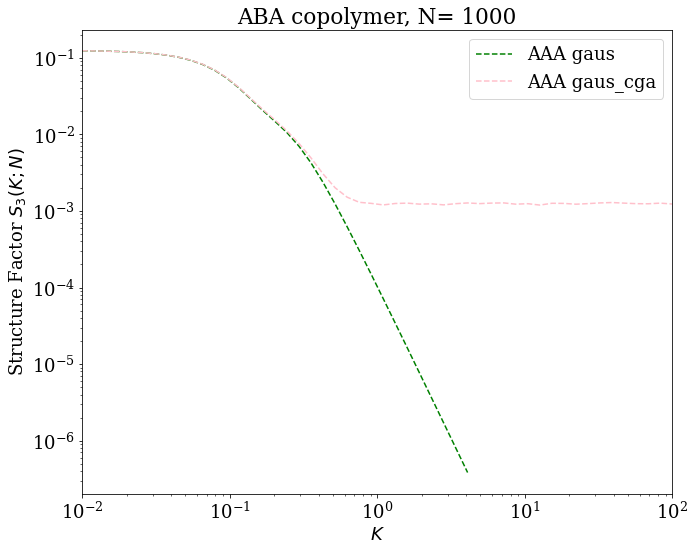

In [16]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


# plt.plot(k_vec[:], s3_arr_vert_AAA[:], label = "AAA vertex diblock", linestyle = "-", color = "blue")
plt.plot(k_vec[:], s3_gaus_AAA[:]/N**3, label = "AAA gaus", linestyle = "--", color = "green", alpha = 1)
plt.plot(k_vec[:], s3_gaus_cga_AAA[:], label = "AAA gaus_cga", linestyle = "--", color = "pink")
# plt.plot(k_vec[:], s3_gaus_cga_AAA_dib[:], label = "AAA gaus_cga_dib", linestyle = "-", color = "black")

# plt.plot(k_vec[:], s3_arr_vert_AAB[:], label = "AAB vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_AAB[:]/N**3, label = "AAB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_AAB[:], label = "AAB gaus_cga", linestyle = "--", color = "pink")

# plt.plot(k_vec[:], s3_arr_vert_ABA[:], label = "ABA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_ABA[:]/N**3, label = "ABA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_ABA[:], label = "ABA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s3_arr_vert_BAA[:], label = "BAA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_BAA[:]/N**3, label = "BAA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_BAA[:], label = "BAA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s3_arr_vert_ABB[:], label = "ABB vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_ABB[:]/N**3, label = "ABB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_ABB[:], label = "ABB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s3_arr_vert_BAB[:], label = "BAB vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_BAB[:]/N**3, label = "BAB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_BAB[:], label = "BAB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s3_arr_vert_BBA[:], label = "BBA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s3_gaus_BBA[:]/N**3, label = "BBA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_BBA[:], label = "BBA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s3_arr_vert_BBB[:], label = "BBB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s3_gaus_BBB[:]/N**3, label = "BBB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s3_gaus_cga_BBB[:], label = "BBB gaus_cga", linestyle = "--", color = "pink", alpha = 1)


plt.xscale('log')
plt.yscale('log')

plt.title("ABA copolymer, N= " + str(N))# + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{3}(K;N)$')
plt.xlim((1e-2, 1e2))
# plt.ylim((1e-5, 1e10))
plt.tight_layout()
plt.legend()
plt.show()

#### S4

In [17]:
FA = 0.5
N = 10000

# poly_mat = [0,1]
# M = 2
poly_mat = [0,1,1,0]
M = 4
dens = [1.]
b = 1
N_m = N/M
k_vec = np.logspace(-2, 2, 50)


n_p = 15
n_b = 200
n_b_calc = n_b 
poly_sim = [0]*int(n_b/2) + [1]*int(n_b/2)
# poly_sim = [0]*int(n_b/4) + [1]*int(n_b/2) + [0]*int(n_b/4)
length_kuhn = 10
i_snap_0 = 9000
i_snap_f = 10000

#for gaus cga
n_p_gaus_cga = n_p
n_b_gaus_cga = 20#n_b
# poly_gaus_cga = [0]*int(n_b_gaus_cga/2) + [1]*int(n_b_gaus_cga/2)
poly_gaus_cga = [0]*int(n_b_gaus_cga/4) + [1]*int(n_b_gaus_cga/2) + [0]*int(n_b_gaus_cga/4)
# num_snaps_gaus_cga = 10
# num_steps = n_b_gaus_cga * n_p * (num_snaps_gaus_cga)
std = (b*((N/(3*n_b_gaus_cga))**0.5))#*(3**-0.5)


k0 = 1e-2
kf = 1e2
nk = 50
k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = np.pi#np.pi/3 #2* np.pi * 1 / 3
theta_2 = 2*np.pi/3

frac = 1
k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

In [18]:
%%time
s4_gaus_AAAA, s4_gaus_AAAB, s4_gaus_AABA, s4_gaus_ABAA,\
s4_gaus_BAAA, s4_gaus_AABB, s4_gaus_BBAA, s4_gaus_BAAB,\
s4_gaus_ABBA, s4_gaus_BABA, s4_gaus_ABAB, s4_gaus_BBBA,\
s4_gaus_BBAB, s4_gaus_BABB, s4_gaus_ABBB, s4_gaus_BBBB  = calc_sf4(poly_mat, dens, N_m, b, k1_vec, k2_vec, k3_vec, plotting = True)

Wall time: 586 ms


In [ ]:
%%time
#VERTEX

s4_arr_vert_AAAA = np.zeros(nk)
s4_arr_vert_AAAB = np.zeros(nk)
s4_arr_vert_AABA = np.zeros(nk)
s4_arr_vert_ABAA = np.zeros(nk)
s4_arr_vert_BAAA = np.zeros(nk)
s4_arr_vert_AABB = np.zeros(nk)
s4_arr_vert_BBAA = np.zeros(nk)
s4_arr_vert_BAAB = np.zeros(nk)
s4_arr_vert_ABBA = np.zeros(nk)
s4_arr_vert_BABA = np.zeros(nk)
s4_arr_vert_ABAB = np.zeros(nk)
s4_arr_vert_BBBA = np.zeros(nk)
s4_arr_vert_BBAB = np.zeros(nk)
s4_arr_vert_BABB = np.zeros(nk)
s4_arr_vert_ABBB = np.zeros(nk)
s4_arr_vert_BBBB = np.zeros(nk)

for i in range(nk):
    Ks = k1_vec[i], k2_vec[i], k3_vec[i], k4_vec[i]
    s4_mat = (s4wlc(pset, wigset, N, FA, Ks, sequence='all'))
    s4_arr_vert_AAAA[i] = (s4_mat/ (N**4))[0][0][0][0]
    s4_arr_vert_AAAB[i] = (s4_mat/ (N**4))[0][0][0][1]
    s4_arr_vert_AABA[i] = (s4_mat/ (N**4))[0][0][1][0]
    s4_arr_vert_ABAA[i] = (s4_mat/ (N**4))[0][1][0][0]
    s4_arr_vert_BAAA[i] = (s4_mat/ (N**4))[1][0][0][0]
    s4_arr_vert_AABB[i] = (s4_mat/ (N**4))[0][0][1][1]
    s4_arr_vert_BBAA[i] = (s4_mat/ (N**4))[1][1][0][0]
    s4_arr_vert_BAAB[i] = (s4_mat/ (N**4))[1][0][0][1]
    s4_arr_vert_ABBA[i] = (s4_mat/ (N**4))[0][1][1][0]
    s4_arr_vert_BABA[i] = (s4_mat/ (N**4))[1][0][1][0]
    s4_arr_vert_ABAB[i] = (s4_mat/ (N**4))[0][1][0][1]
    s4_arr_vert_BBBA[i] = (s4_mat/ (N**4))[1][1][1][0]
    s4_arr_vert_BBAB[i] = (s4_mat/ (N**4))[1][1][0][1]
    s4_arr_vert_BABB[i] = (s4_mat/ (N**4))[1][0][1][1]
    s4_arr_vert_ABBB[i] = (s4_mat/ (N**4))[0][1][1][1]
    s4_arr_vert_BBBB[i] = (s4_mat/ (N**4))[1][1][1][1]

In [ ]:
# %%time

# s4_sim_AAAA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_AAAB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_AABA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_ABAA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BAAA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_AABB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BBAA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BAAB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_ABBA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_ABAB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BABA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BBBA = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BBAB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BABB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_ABBB = np.zeros(nk, dtype = type(1 + 1j))
# s4_sim_BBBB = np.zeros(nk, dtype = type(1 + 1j))


# for i_snap in range(i_snap_0, i_snap_f + 1):
#     r_snap = np.loadtxt('sim_data_1k/r' + str(i_snap))
#     for i_p in range(n_p):
#         i_0 = n_b * i_p
#         i_f = i_0 + n_b_calc
# #         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, :] / 2
#         sigma_A = np.array(poly_sim)# r_snap[i_0:i_f, 3] 
#         sigma_B = 1-sigma_A
        
#         s_mat1_A = sigma_A*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
#         s_mat1_B = sigma_B*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        
#         s_mat2_A = sigma_A*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
#         s_mat2_B = sigma_B*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        
#         s_mat3_A = sigma_A*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
#         s_mat3_B = sigma_B*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        
#         s_mat4_A = sigma_A*np.exp(1j * (np.outer(k4_vec[:, 0], r_i[:, 0]) + np.outer(k4_vec[:, 1], r_i[:, 1]) + np.outer(k4_vec[:, 2], r_i[:, 2])))        
#         s_mat4_B = sigma_B*np.exp(1j * (np.outer(k4_vec[:, 0], r_i[:, 0]) + np.outer(k4_vec[:, 1], r_i[:, 1]) + np.outer(k4_vec[:, 2], r_i[:, 2])))        
        
#         s4_sim_AAAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_AAAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_AABA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_ABAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BAAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_AABB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BBAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BAAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_ABBA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_ABAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BABA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BBBA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BBAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BABB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_ABBB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)
#         s4_sim_BBBB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)


In [44]:
%%time

s4_gaus_cga_AAAA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_AAAB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_AABA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_ABAA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BAAA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_AABB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BBAA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BAAB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_ABBA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_ABAB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BABA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BBBA = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BBAB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BABB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_ABBB = np.zeros(nk, dtype = type(1 + 1j))
s4_gaus_cga_BBBB = np.zeros(nk, dtype = type(1 + 1j))


for i_snap in range(i_snap_0, i_snap_f + 1):
    steps = np.random.normal(scale = std, size=(n_p_gaus_cga * n_b_gaus_cga,3))
    for i_p in range(n_p_gaus_cga):
        i_0 = n_b_gaus_cga * i_p
        i_f = i_0 + n_b_gaus_cga
#         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, :] / 2
        r_i = np.cumsum(steps[i_0:i_f], axis = 0)

        sigma_A = 1-np.array(poly_gaus_cga)# r_snap[i_0:i_f, 3] 
        sigma_B = 1-sigma_A
        
        s_mat1_A = sigma_A*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        s_mat1_B = sigma_B*np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        
        s_mat2_A = sigma_A*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        s_mat2_B = sigma_B*np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        
        s_mat3_A = sigma_A*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        s_mat3_B = sigma_B*np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        
        s_mat4_A = sigma_A*np.exp(1j * (np.outer(k4_vec[:, 0], r_i[:, 0]) + np.outer(k4_vec[:, 1], r_i[:, 1]) + np.outer(k4_vec[:, 2], r_i[:, 2])))        
        s_mat4_B = sigma_B*np.exp(1j * (np.outer(k4_vec[:, 0], r_i[:, 0]) + np.outer(k4_vec[:, 1], r_i[:, 1]) + np.outer(k4_vec[:, 2], r_i[:, 2])))        
        
        s4_gaus_cga_AAAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_AAAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_AABA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_ABAA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BAAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_AABB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BBAA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BAAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_ABBA += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_ABAB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BABA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BBBA += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_A, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BBAB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_A, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BABB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_A, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_ABBB += np.sum(s_mat1_A, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)
        s4_gaus_cga_BBBB += np.sum(s_mat1_B, axis = 1) * np.sum(s_mat2_B, axis = 1) * np.sum(s_mat3_B, axis = 1) * np.sum(s_mat4_B, axis = 1) / (n_b_gaus_cga ** 4 * (i_snap_f - i_snap_0 + 1) * n_p_gaus_cga)


Wall time: 23.8 s


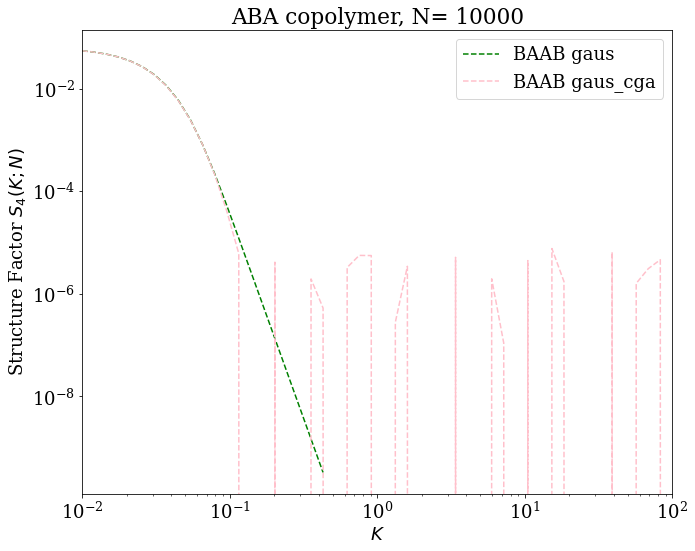

In [45]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec[:], s4_arr_vert_AAAA[:], label = "AAAA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_AAAA[:]/N**4, label = "AAAA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_AAAA[:], label = "AAAA gaus_cga", linestyle = "--", color = "pink")

# plt.plot(k_vec[:], s4_arr_vert_AAAB[:], label = "AAAB vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_AAAB[:]/N**4, label = "AAAB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_AAAB[:], label = "AAAB gaus_cga", linestyle = "--", color = "pink")

# plt.plot(k_vec[:], s4_arr_vert_AABA[:], label = "AABA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_AABA[:]/N**4, label = "AABA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_AABA[:], label = "AABA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_ABAA[:], label = "ABAA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_ABAA[:]/N**4, label = "ABAA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_ABAA[:], label = "ABAA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BAAA[:], label = "BAAA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_BAAA[:]/N**4, label = "BAAA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BAAA[:], label = "BAAA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_AABB[:], label = "AABB vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_AABB[:]/N**4, label = "AABB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_AABB[:], label = "AABB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BBAA[:], label = "BBAA vertex diblock", linestyle = "-", color = "blue")
# plt.plot(k_vec[:], s4_gaus_BBAA[:]/N**4, label = "BBAA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BBAA[:], label = "BBAA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BAAB[:], label = "BAAB vertex diblock", linestyle = "-", color = "black")
plt.plot(k_vec[:], s4_gaus_BAAB[:]/N**4, label = "BAAB gaus", linestyle = "--", color = "green", alpha = 1)
plt.plot(k_vec[:], s4_gaus_cga_BAAB[:], label = "BAAB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_ABBA[:], label = "ABBA vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_ABBA[:]/N**4, label = "ABBA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_ABBA[:], label = "ABBA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_ABAB[:], label = "ABAB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_ABAB[:]/N**4, label = "ABAB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_ABAB[:], label = "ABAB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BABA[:], label = "BABA vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_BABA[:]/N**4, label = "BABA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BABA[:], label = "BABA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BBBA[:], label = "BBBA vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_BBBA[:]/N**4, label = "BBBA gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BBBA[:], label = "BBBA gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BBAB[:], label = "BBAB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_BBAB[:]/N**4, label = "BBAB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BBAB[:], label = "BBAB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BABB[:], label = "BABB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_BABB[:]/N**4, label = "BABB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BABB[:], label = "BABB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_ABBB[:], label = "ABBB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_ABBB[:]/N**4, label = "ABBB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_ABBB[:], label = "ABBB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

# plt.plot(k_vec[:], s4_arr_vert_BBBB[:], label = "BBBB vertex diblock", linestyle = "-", color = "black")
# plt.plot(k_vec[:], s4_gaus_BBBB[:]/N**4, label = "BBBB gaus", linestyle = "--", color = "green", alpha = 1)
# plt.plot(k_vec[:], s4_gaus_cga_BBBB[:], label = "BBBB gaus_cga", linestyle = "--", color = "pink", alpha = 1)

plt.xscale('log')
plt.yscale('log')

plt.title("ABA copolymer, N= " + str(N))# + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{4}(K;N)$')
plt.xlim((1e-2, 1e2))
# plt.ylim((1e-5, 1e10))
plt.tight_layout()
plt.legend()
plt.show()

## diblock

In [ ]:
# %%time
# #best sf calc- the one andy wrote
# i_snap_f = num_snapshots-1
# i_snap_0 = 0

# s2_sim_cga_vect_copoly_simp = np.zeros(nk,  dtype = type(1 + 1j))
# for i_snap in range(num_snapshots):
#     r_snap = all_snaps_vect_copoly#[i_snap]
#     for i_p in range(n_p):
#         i_0 = n_b * i_p
#         i_f = i_0 + n_b_calc
# #         u_i = u_snap[i_0:i_f, :]
#         r_i = r_snap[i_0:i_f, 0:3]/2
#         sigma_i = r_snap[i_0:i_f, 3] 
#         sigma_j = 1-sigma_i

#         s_mat1 = sigma_i*(np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2]))))        
#         s_mat2 = sigma_j*(np.exp(1j * (np.outer(-k1_vec[:, 0], r_i[:, 0]) + np.outer(-k1_vec[:, 1], r_i[:, 1]) + np.outer(-k1_vec[:, 2], r_i[:, 2]))))        
#         s2_sim_cga_vect_copoly_simp += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p)
#         #    

trying to find where in my free energy calculation am I assuming diblock polymer architecture 

shouldnt [0110] s4_ABBA == [0011] s4_AABB ?
check monomer matrix!

[0011] s4_AABB == [1100] s4_BBAA ?? as a baseline comparison


In [ ]:
# [001] s3_AAB == [011] s3_ABB ?
N = 10000
b = 1
poly_mat = [0,0,1]
M = 3
N_m = N/M
dens = [1.]

grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]

M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA

M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA

M3_AAB_zzo = M3_AAB

In [ ]:
# [001] s3_AAB == [011] s3_ABB ?
N = 10000
b = 1
poly_mat = [0,1,1]
M = 3
N_m = N/M
dens = [1.]

grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]

M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA

M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA

M3_ABB_zoo = M3_ABB

In [ ]:
np.sum(M3_ABB_zoo == M3_AAB_zzo)/3**3

In [ ]:
N = 10000
b = 1
poly_mat = [0,1,0]
M = 3
N_m = N/M
dens = [1.]

grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]

M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)
# M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
# M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
# M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA

# M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
# M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
# M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
# M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA

In [ ]:
#anything with index 1 is invalid
# M3_AAA

In [ ]:
M4_AAAA

In [ ]:
N = 10000
b = 1
poly_mat = [0,0,1,1]
M = 4
N_m = N/M
dens = [1.]

q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
q_star = q_star[0]
lam_q = q_star*np.array([1, 0, 0])
lams_g4 = np.array([lam_q, -lam_q, lam_q, -lam_q])

grid = np.indices((M,M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]
j4 = grid[3]


In [ ]:
M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)

# M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
# M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
# M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
# M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
# + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

# M4_ABAB = M4_AAAA[j1, j1, j3, j3] - M4_AAAA[j1, j1, j3, j4] - M4_AAAA[j1, j1, j2, j3] + M4_AAAA
# M4_ABBA = M4_AAAA[j1,j1,j4,j4] - M4_AAAA[j1, j1, j4, j3] - M4_AAAA[j1, j1, j2, j4] + M4_AAAA[j1, j2, j4, j3]
# M4_BBAB = M4_ABBA[j3, j2, j4, j3] - M4_ABBA[j1, j2, j4, j3]
# M4_BABB = M4_ABBA[j2, j4, j3, j2] - M4_ABBA[j1, j4, j3, j2]
# M4_ABBB = M4_ABBA[j1, j2, j3, j1] - M4_ABBA[j4, j2, j3, j1]

# M4_AAAB = M4_AAAA[j1, j2, j3, j3] - M4_AAAA
M4_AABA = M4_AAAA[j1, j2, j2, j4] - M4_AAAA
# M4_ABAA = M4_AAAA[j1, j1, j3, j4] - M4_AAAA
M4_AABB = M4_AABA[j1, j2, j3, j1] - M4_AABA
# M4_BAAB = M4_BAAA[j1, j2, j3, j3] - M4_BAAA
# M4_BABA = M4_BAAA[j1, j2, j2 ,j4] - M4_BAAA

zzoo = calc_sf4(poly_mat, dens, N_m, b, lam_q, -lam_q, lam_q, plotting = False)
zzoo

In [ ]:
N = 10000
b = 1
poly_mat = [1,1,0,0]
M = 4
N_m = N/M
dens = [1.]

q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
q_star = q_star[0]
lam_q = q_star*np.array([1, 0, 0])
lams_g4 = np.array([lam_q, -lam_q, lam_q, -lam_q])

grid = np.indices((M,M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]
j4 = grid[3]


In [ ]:
M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)

M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
# M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
# M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
# + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

# M4_ABAB = M4_AAAA[j1, j1, j3, j3] - M4_AAAA[j1, j1, j3, j4] - M4_AAAA[j1, j1, j2, j3] + M4_AAAA
# M4_ABBA = M4_AAAA[j1,j1,j4,j4] - M4_AAAA[j1, j1, j4, j3] - M4_AAAA[j1, j1, j2, j4] + M4_AAAA[j1, j2, j4, j3]
# M4_BBAB = M4_ABBA[j3, j2, j4, j3] - M4_ABBA[j1, j2, j4, j3]
# M4_BABB = M4_ABBA[j2, j4, j3, j2] - M4_ABBA[j1, j4, j3, j2]
# M4_ABBB = M4_ABBA[j1, j2, j3, j1] - M4_ABBA[j4, j2, j3, j1]

# M4_AAAB = M4_AAAA[j1, j2, j3, j3] - M4_AAAA
# M4_AABA = M4_AAAA[j1, j2, j2, j4] - M4_AAAA
# M4_ABAA = M4_AAAA[j1, j1, j3, j4] - M4_AAAA
# M4_AABB = M4_AABA[j1, j2, j3, j1] - M4_AABA
# M4_BAAB = M4_BAAA[j1, j2, j3, j3] - M4_BAAA
# M4_BABA = M4_BAAA[j1, j2, j2 ,j4] - M4_BAAA

zzoo = calc_sf4(poly_mat, dens, N_m, b, lam_q, -lam_q, lam_q, plotting = False)
zzoo

In [ ]:
np.sum(M4_AABB == M4_BBAA) /(4**4)

In [ ]:
np.sum(M4_AABB == M4_BAAB) /(4**4)

In [ ]:
N = 10000
b = 1
poly_mat = [1,0,0,1]
M = 4
N_m = N/M
dens = [1.]

q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
q_star = q_star[0]
lam_q = q_star*np.array([1, 0, 0])
lams_g4 = np.array([lam_q, -lam_q, lam_q, -lam_q])


In [ ]:
M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)

M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
# M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
# M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
# M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
# + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

# M4_ABAB = M4_AAAA[j1, j1, j3, j3] - M4_AAAA[j1, j1, j3, j4] - M4_AAAA[j1, j1, j2, j3] + M4_AAAA
# M4_ABBA = M4_AAAA[j1,j1,j4,j4] - M4_AAAA[j1, j1, j4, j3] - M4_AAAA[j1, j1, j2, j4] + M4_AAAA[j1, j2, j4, j3]
# M4_BBAB = M4_ABBA[j3, j2, j4, j3] - M4_ABBA[j1, j2, j4, j3]
# M4_BABB = M4_ABBA[j2, j4, j3, j2] - M4_ABBA[j1, j4, j3, j2]
# M4_ABBB = M4_ABBA[j1, j2, j3, j1] - M4_ABBA[j4, j2, j3, j1]

# M4_AAAB = M4_AAAA[j1, j2, j3, j3] - M4_AAAA
# M4_AABA = M4_AAAA[j1, j2, j2, j4] - M4_AAAA
# M4_ABAA = M4_AAAA[j1, j1, j3, j4] - M4_AAAA
# M4_AABB = M4_AABA[j1, j2, j3, j1] - M4_AABA
M4_BAAB = M4_BAAA[j1, j2, j3, j3] - M4_BAAA
# M4_BABA = M4_BAAA[j1, j2, j2 ,j4] - M4_BAAA

ozzo = calc_sf4(poly_mat, dens, N_m, b, lam_q, -lam_q, lam_q, plotting = False)
ozzo

In [ ]:
M4_BAAB#[0][1][2][3]

In [ ]:
M4_AABB#[0][1][2][3]